In [20]:
# import the dataset
import pandas as pd
import numpy as np


In [21]:
parliament = pd.read_csv("merged_coalition.csv")
parliament.head()

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Victor ABENS,1802,Luxembourg,Socialist Group,NaN,Parti ouvrier socialiste luxembourgeois,1979-1984,07-1979,male,centre-left
1,Gordon J. ADAM,1427,United Kingdom,Socialist Group,NaN,Labour Party,1979-1984,07-1979,male,centre-left
2,Pietro ADONNINO,957,Italy,European People's Party,NaN,Democrazia cristiana,1979-1984,07-1979,male,centre-right
3,Jochen van AERSSEN,1797,Germany,European People's Party,NaN,Christlich Demokratische Union Deutschlands,1979-1984,07-1979,male,centre-right
4,Susanna AGNELLI,943,Italy,Liberal and Democratic Group,NaN,Partito repubblicano italiano,1979-1984,07-1979,female,centre


In [22]:
term7 = parliament[parliament["term"]== "2009-2014"]
term8 = parliament[parliament["term"]== "2014-2019"]
term9 = parliament[parliament["term"]== "2019-2024"]
merged789 = pd.concat([term7, term8, term9])
merged78 = pd.concat([term7,term8])
merged79 = pd.concat([term7,term9])
merged89 = pd.concat([term8,term9])

In [23]:
import networkx as nx

from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
dati7 = {'source': 'term7', 'target': [*term7['fullName'].tolist()]}
df1 = pd.DataFrame(dati7, columns=['source','target'])

dati8 = {'source': 'term8', 'target': [*term8['fullName'].tolist()]}
df2 = pd.DataFrame(dati8, columns=['source','target'])

dati9 = {'source': 'term9', 'target': [*term9['fullName'].tolist()]}
df3 = pd.DataFrame(dati9, columns=['source','target'])

In [25]:
result = pd.concat([df1, df2, df3])
result78 = pd.concat([df1, df2])
result79 = pd.concat([df1, df3])
result89 = pd.concat([df2, df3])

In [26]:
# Let's see if some deputies have been elected for more than one term
# among the last three
result['target'].duplicated().any()

True

In [27]:
g = nx.from_pandas_edgelist(result, source='source', target='target')

In [9]:
color_map = []
nodes = list(g.nodes)
terms = ['term7', 'term8', 'term9']
nodes = list(g.nodes)
for node in g:
    if node in terms:
        color_map.append('black')
    elif sum(result[result['target'] == node].value_counts()) == 3:
        color_map.append('red')
    elif sum(result[result['target'] == node].value_counts()) == 2: 
        color_map.append('green')
    else:
        color_map.append('blue')
        
color_map

['black',
 'blue',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'red',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'bl

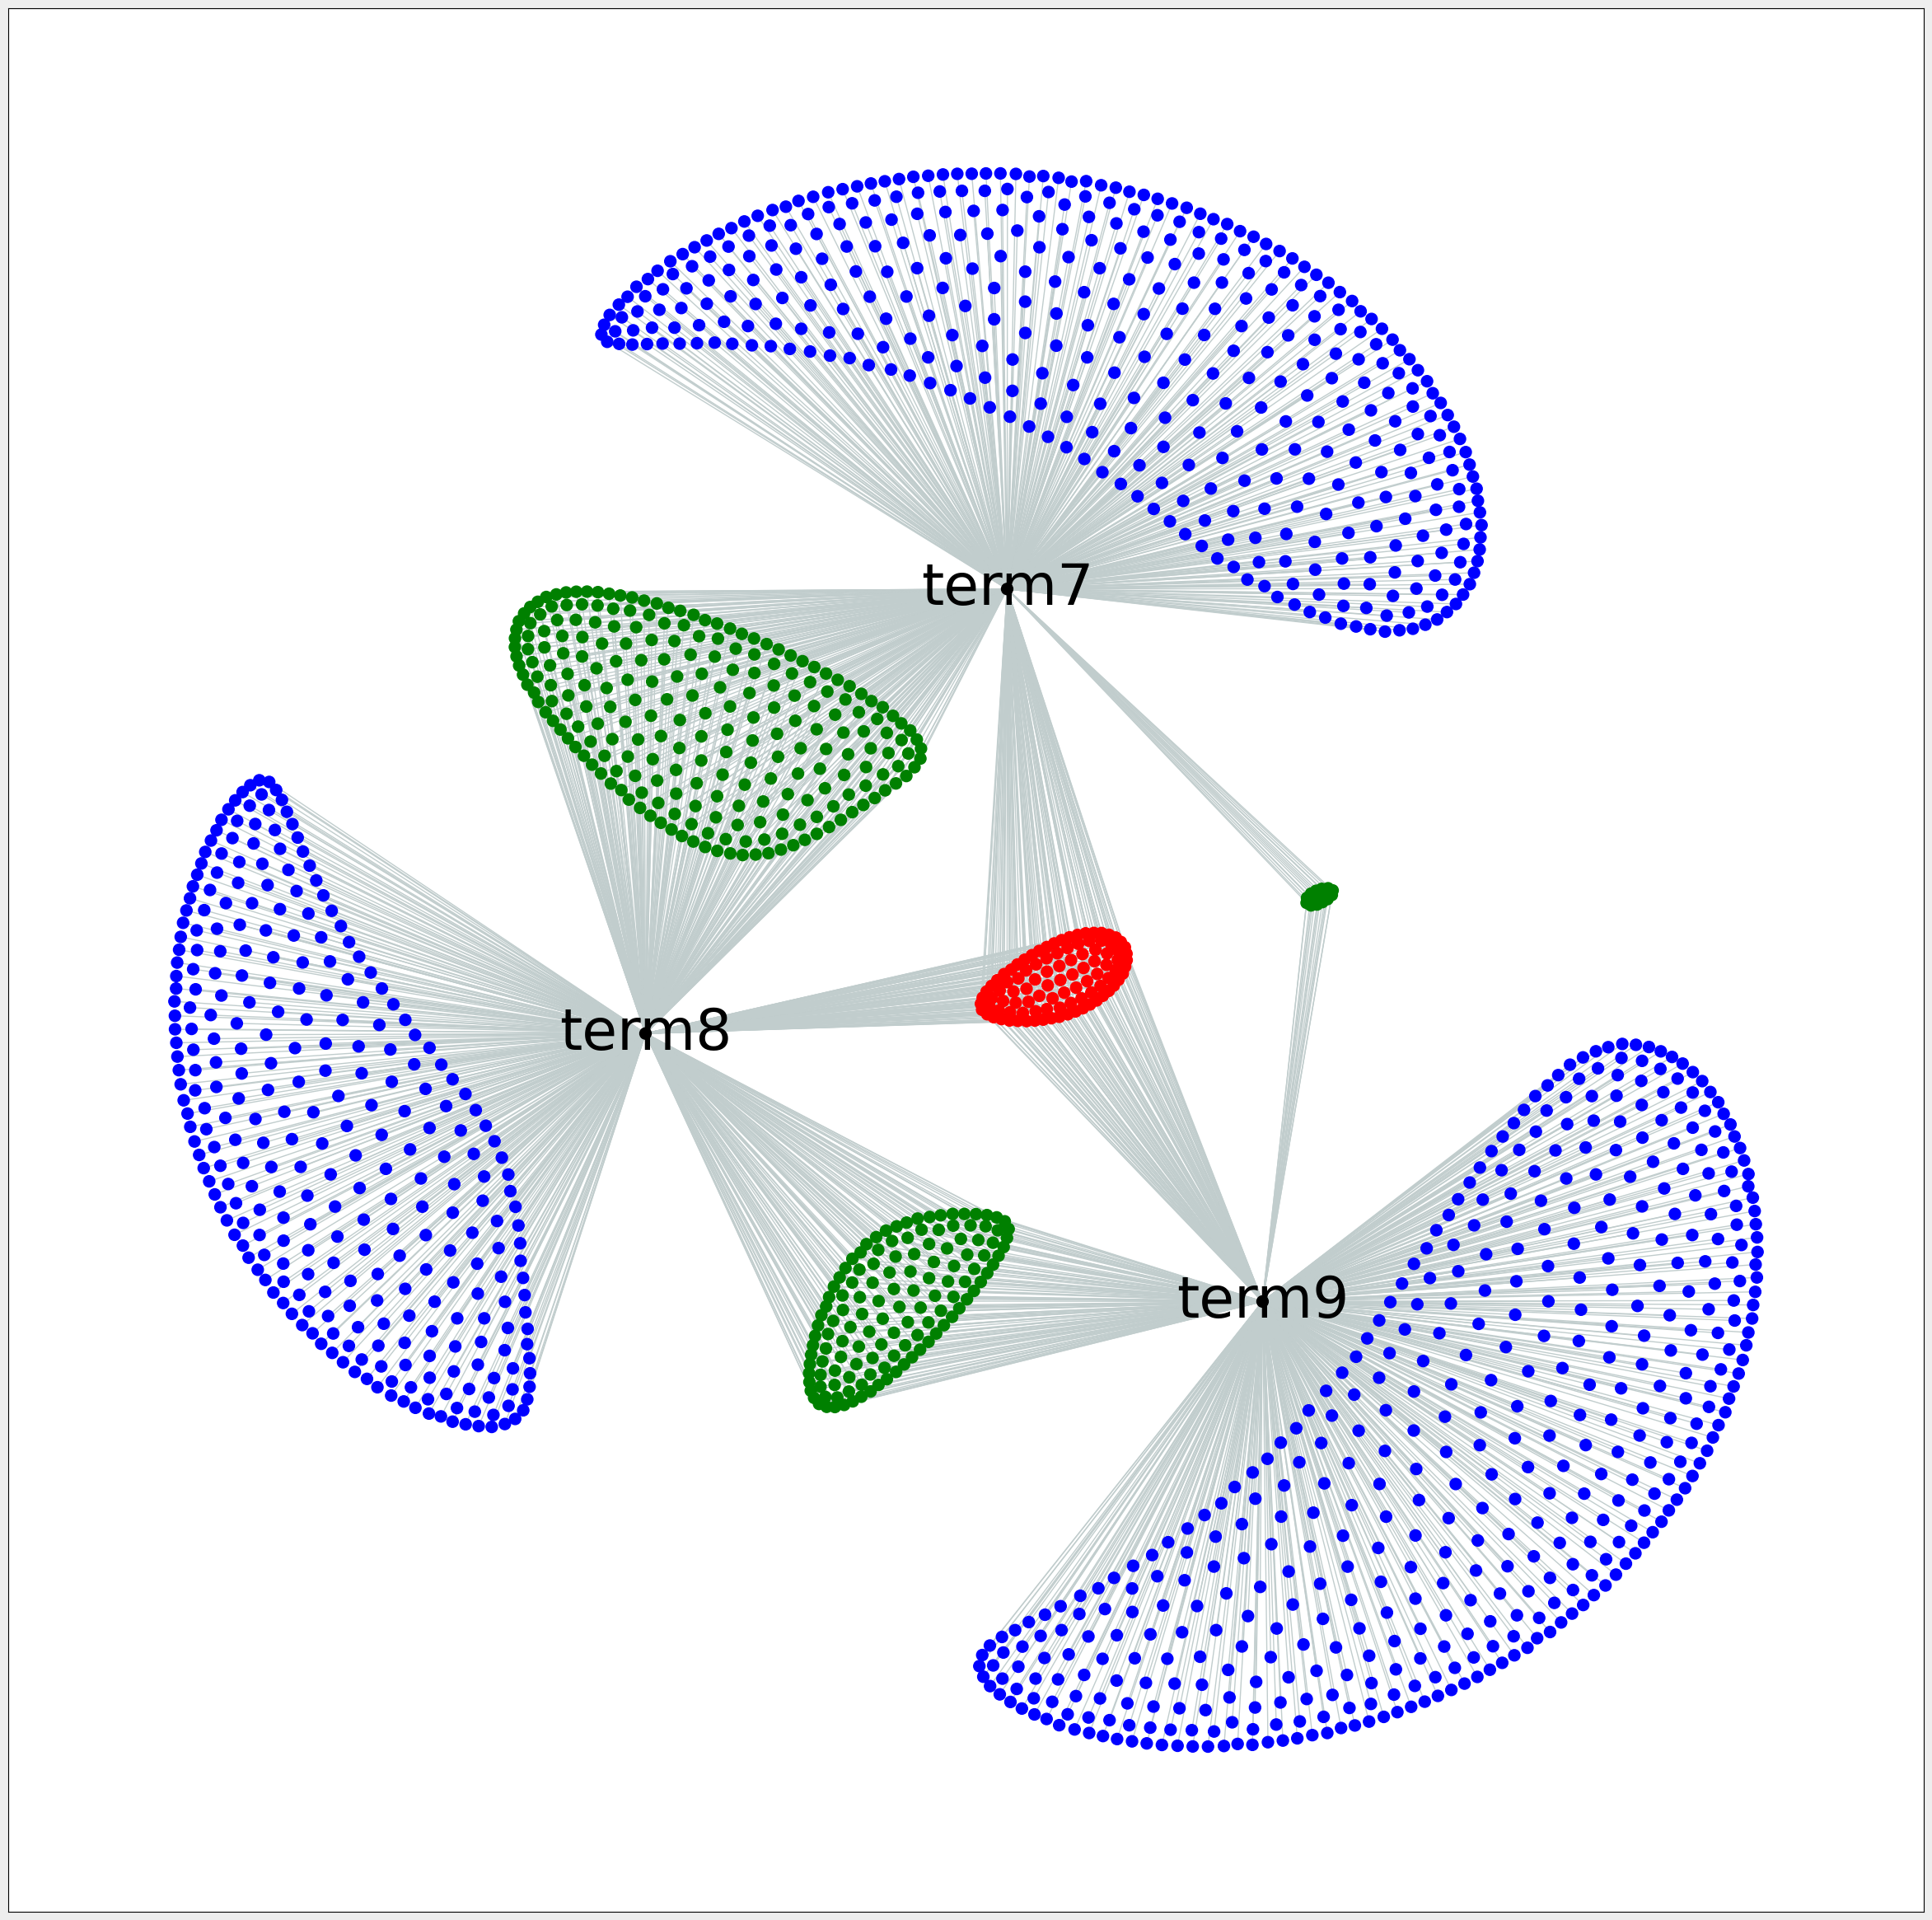

In [20]:
options = {
    'edge_color': '#C1CDCD',
    'node_size': 100
}

fig = plt.figure(1, figsize=(30, 30))

nx.draw_networkx(g,with_labels= False, **options, pos = nx.kamada_kawai_layout(g), node_color=color_map)

nx.draw_networkx_edges(g, pos = nx.kamada_kawai_layout(g), alpha = 0.5, width = 0.0001)

labels = {} 
x = ['term7', 'term8', 'term9']
for i in range(0,len(x)):
    for node in g.nodes():
        if node == x[i]:
        #set the node name as the key and the label as its value 
            labels[node] = node
nx.draw_networkx_labels(g,nx.kamada_kawai_layout(g),labels,font_size=50,font_color='#000000')

fig.set_facecolor("#eeeeee")
plt.savefig("Graph.png", format="PNG")


In [10]:
count = {}
for node in g:
    count[node] = sum(result[result['target'] == node].value_counts())
count

{'term7': 0,
 'Damien ABAD': 1,
 'János ÁDER': 1,
 'John Stuart AGNEW': 2,
 'Gabriele ALBERTINI': 1,
 'Jan Philipp ALBRECHT': 2,
 'Sonia ALFANO': 1,
 'François ALFONSI': 2,
 'Magdi Cristiano ALLAM': 1,
 'Magdalena ALVAREZ': 1,
 'Alexander Nuno PICKART ALVARO': 1,
 'Luís Paulo ALVES': 1,
 'Marta ANDREASEN': 1,
 'Josefa ANDRÉS BAREA': 1,
 'Laima Liucija ANDRIKIENĖ': 1,
 'Roberta ANGELILLI': 1,
 'Antonello ANTINORO': 1,
 'Elena Oana ANTONESCU': 1,
 'Alfredo ANTONIOZZI': 1,
 'Pablo ARIAS ECHEVERRÍA': 2,
 'Kader ARIF': 1,
 'Pino ARLACCHI': 1,
 'Kriton ARSENIS': 1,
 'Richard ASHWORTH': 2,
 'Sir Robert ATKINS': 1,
 'John ATTARD-MONTALTO': 1,
 'Sophie AUCONIE': 1,
 'Jean-Pierre AUDY': 1,
 'Margrete AUKEN': 3,
 'Inés AYALA SENDER': 2,
 'Liam AYLWARD': 1,
 'Pilar AYUSO': 2,
 'Johannes Cornelis VAN BAALEN': 2,
 'Georges BACH': 2,
 'Maria BADIA i CUTCHET': 1,
 'Zigmantas BALČYTIS': 2,
 'Zoltán BALCZÓ': 2,
 'Raffaele BALDASSARRE': 1,
 'Marino BALDINI': 1,
 'Burkhard BALZ': 2,
 'Francesca BALZANI': 

In [11]:
# create a dataset with all deputies that have been elected for all three terms
three_terms = pd.DataFrame(columns = merged789.columns)

for node in g:
    if sum(result[result['target'] == node].value_counts()) == 3:
        three_terms = pd.concat([three_terms, merged789[merged789['fullName'] == node]], ignore_index=True)

three_terms

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
1,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2014-2019,07-2014,female,centre-left
2,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2019-2024,07-2019,female,centre-left
3,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2009-2014,07-2009,female,centre-left
4,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2014-2019,07-2014,female,centre-left
...,...,...,...,...,...,...,...,...,...,...
292,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2014-2019,07-2014,male,centre-right
293,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Naţional Liberal,2019-2024,07-2019,male,centre-right
294,Evžen TOŠENOVSKÝ,96713,Czechia,European Conservatives and Reformists Group,NaN,Občanská demokratická strana,2009-2014,07-2009,male,right
295,Evžen TOŠENOVSKÝ,96713,Czechia,European Conservatives and Reformists Group,NaN,Občanská demokratická strana,2014-2019,07-2014,male,right


In [12]:
import plotly.express as px
from plotly.offline import plot

# Define a function to create the bar chart for a given term
def create_bar_chart(term):

    # Define the colors to use for each political orientation
    colors = {'left': 'red', 'centre-left': 'orange', 'centre': 'yellow', 'centre-right': 'green', 'right': 'blue', 'Non aligned': 'gray'}
    # Filter the dataframe for the selected term
    filtered_df = three_terms[three_terms['term'] == term]
    # Group by political orientation and count the number of deputies in each group
    counts = filtered_df.groupby('orientation')['fullName'].count().reset_index(name='count')
    # Create the bar chart using Plotly
    fig = px.bar(counts, x='orientation', y='count', color='orientation', color_discrete_map=colors)
    
    fig.update_layout(title='Deputies in term {}'.format(term))
    fig.update_layout(plot_bgcolor='#eeeeee', paper_bgcolor="#eeeeee")

    return fig

fig = create_bar_chart('2009-2014')
plot(fig)

'temp-plot.html'

In [13]:
# with orientation reordered

import plotly.express as px
from plotly.offline import plot

# Define the desired order of political orientations
orientation_order = ['left', 'centre-left', 'centre', 'centre-right', 'right', 'Non aligned']

# Define a function to create the bar chart for a given term
def create_bar_chart(term):

    # Define the colors to use for each political orientation
    colors = {'left': 'red', 'centre-left': 'orange', 'centre': 'yellow', 'centre-right': 'green', 'right': 'blue', 'Non aligned': 'gray'}
    # Filter the dataframe for the selected term
    filtered_df = three_terms[three_terms['term'] == term]
    # Group by political orientation and count the number of deputies in each group
    counts = filtered_df.groupby('orientation')['fullName'].count().reset_index(name='count')
    # Reorder the counts by the desired order of political orientations
    counts = counts.set_index('orientation').reindex(orientation_order).reset_index()
    # Create the bar chart using Plotly
    fig = px.bar(counts, x='orientation', y='count', color='orientation', color_discrete_map=colors, text='count')
    fig.update_layout(title='Deputies in term {}'.format(term))
    fig.update_layout(plot_bgcolor='#eeeeee', paper_bgcolor="#eeeeee")
    
    return fig

fig = create_bar_chart('2019-2024')
plot(fig)


'temp-plot.html'

### Pie charts e bar charts

In [14]:
# create a dataset with all deputies that have been elected for all three terms
three_terms1 = pd.DataFrame(columns = merged789.columns)

for node in g:
    if sum(result[result['target'] == node].value_counts()) == 3:
        three_terms1 = pd.concat([three_terms, merged789[merged789['fullName'] == node]], ignore_index=True)

three_terms1 = three_terms1.drop_duplicates(subset=['fullName'])
three_terms1

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
3,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2009-2014,07-2009,female,centre-left
6,Izaskun BILBAO BARANDICA,96922,Spain,Group of the Alliance of Liberals and Democrat...,NaN,Partido Nacionalista Vasco,2009-2014,07-2009,female,centre
9,Vilija BLINKEVIČIŪTĖ,96681,Lithuania,Group of the Progressive Alliance of Socialist...,NaN,Lietuvos socialdemokratų partija,2009-2014,07-2009,female,centre-left
12,Udo BULLMANN,4267,Germany,Group of the Progressive Alliance of Socialist...,NaN,Sozialdemokratische Partei Deutschlands,2009-2014,07-2009,male,centre-left
...,...,...,...,...,...,...,...,...,...,...
282,Tatjana ŽDANOKA,28619,Latvia,Group of the Greens/European Free Alliance,NaN,Par cilvēka tiesībām vienotā Latvijā,2009-2014,07-2009,female,centre-left
285,Roberts ZĪLE,28615,Latvia,European Conservatives and Reformists Group,NaN,Tēvzemei un Brīvībai/LNNK,2009-2014,07-2009,male,right
288,Milan ZVER,96933,Slovenia,European People's Party,NaN,Slovenska demokratska stranka,2009-2014,07-2009,male,centre-right
291,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2009-2014,07-2009,male,centre-right


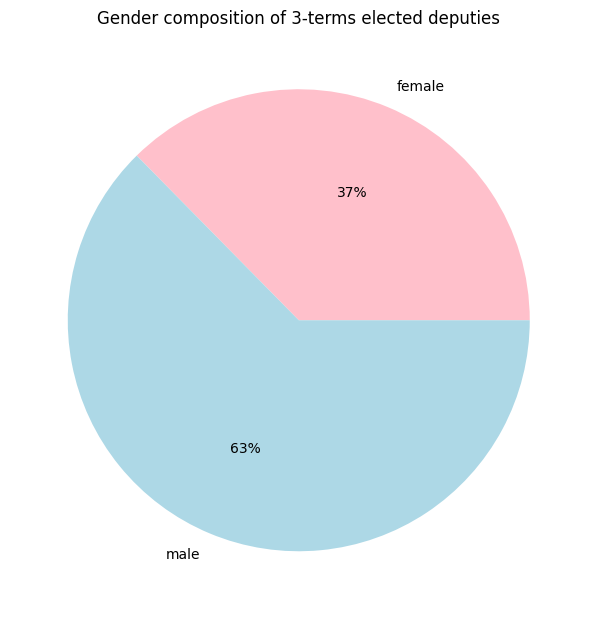

In [18]:
df_plt1 = three_terms.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt1['Count'], labels = df_plt1.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of 3-terms elected deputies')
plt.savefig("gender1.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

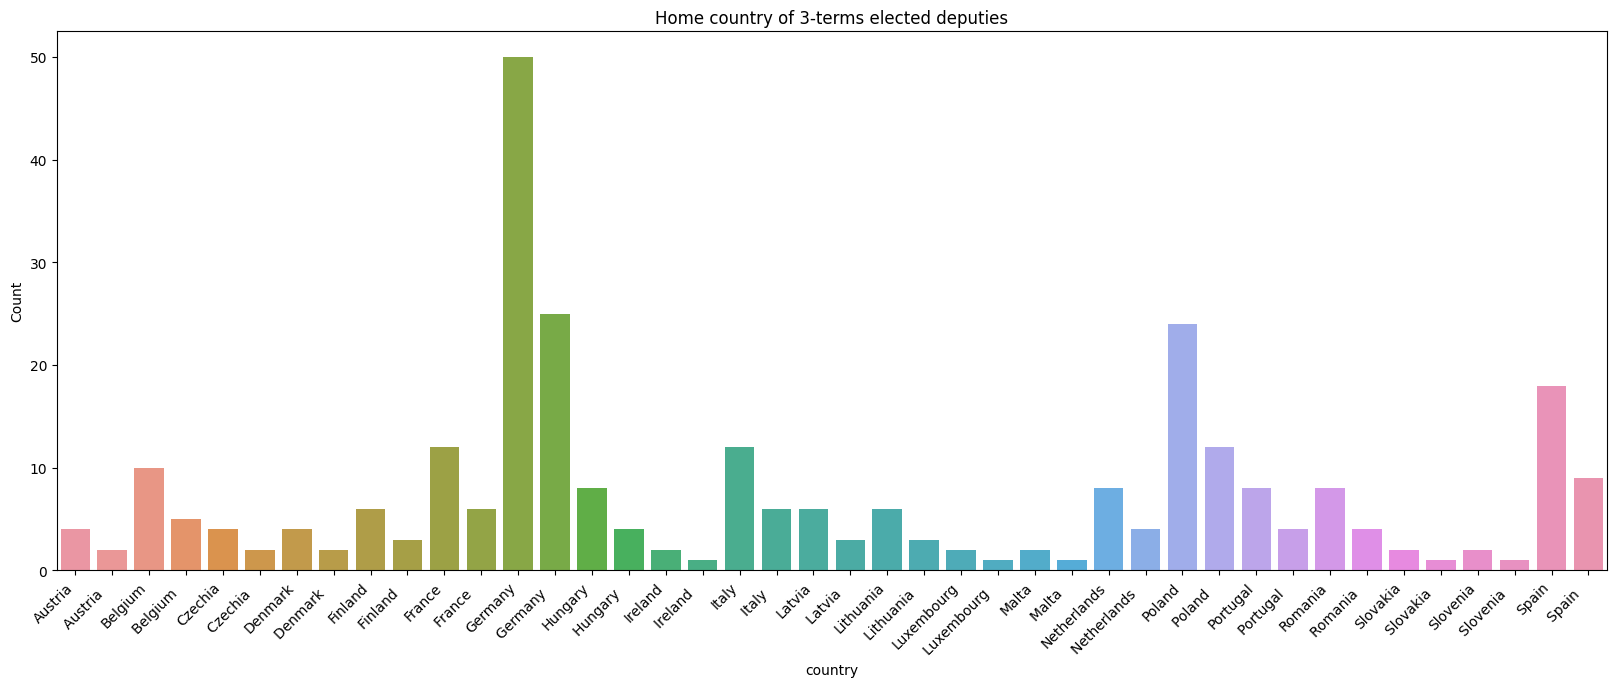

In [31]:
df_plt1 = three_terms.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c = sns.barplot(x = df_plt1.index, y = 'Count', data = df_plt1)
c.set(title='Home country of 3-terms elected deputies')
c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right')
c.set_ylabel('Count')

In [28]:
# create a dataset with all deputies that have been elected for terms 7 and 8
terms_78 = pd.DataFrame(columns = merged78.columns)

for node in g:
    if sum(result78[result78['target'] == node].value_counts()) == 2:
        terms_78 = pd.concat([terms_78, merged78[merged78['fullName'] == node]], ignore_index=True)

        terms_78 = terms_78.drop_duplicates(subset=['fullName'])
terms_78

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,John Stuart AGNEW,96897,United Kingdom,Europe of freedom and democracy Group,NaN,United Kingdom Independence Party,2009-2014,07-2009,male,right
1,Jan Philipp ALBRECHT,96736,Germany,Group of the Greens/European Free Alliance,NaN,Bündnis 90/Die Grünen,2009-2014,07-2009,male,centre-left
2,Richard ASHWORTH,28132,United Kingdom,European Conservatives and Reformists Group,NaN,Conservative Party,2009-2014,07-2009,male,right
3,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
4,Inés AYALA SENDER,28292,Spain,Group of the Progressive Alliance of Socialist...,NaN,Partido Socialista Obrero Español,2009-2014,07-2009,female,centre-left
...,...,...,...,...,...,...,...,...,...,...
328,Nirj DEVA,4556,United Kingdom,European Conservatives and Reformists Group,NaN,Conservative Party,2009-2014,07-2009,male,right
329,Gerben-Jan GERBRANDY,96940,Netherlands,Group of the Alliance of Liberals and Democrat...,NaN,Democraten 66,2009-2014,07-2009,male,centre
330,Dieter-Lebrecht KOCH,1852,Germany,European People's Party,NaN,Christlich Demokratische Union Deutschlands,2009-2014,07-2009,male,centre-right
331,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2009-2014,07-2009,male,centre-right


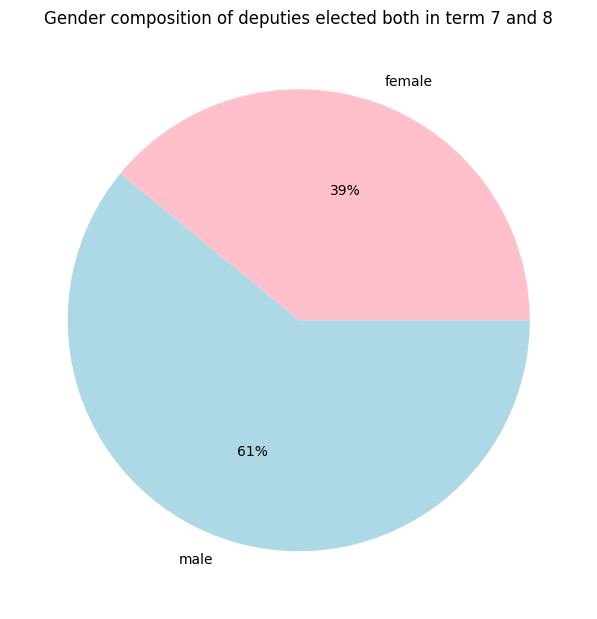

In [29]:
df_plt2 = terms_78.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt2['Count'], labels = df_plt2.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 7 and 8')
plt.savefig("gender2.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

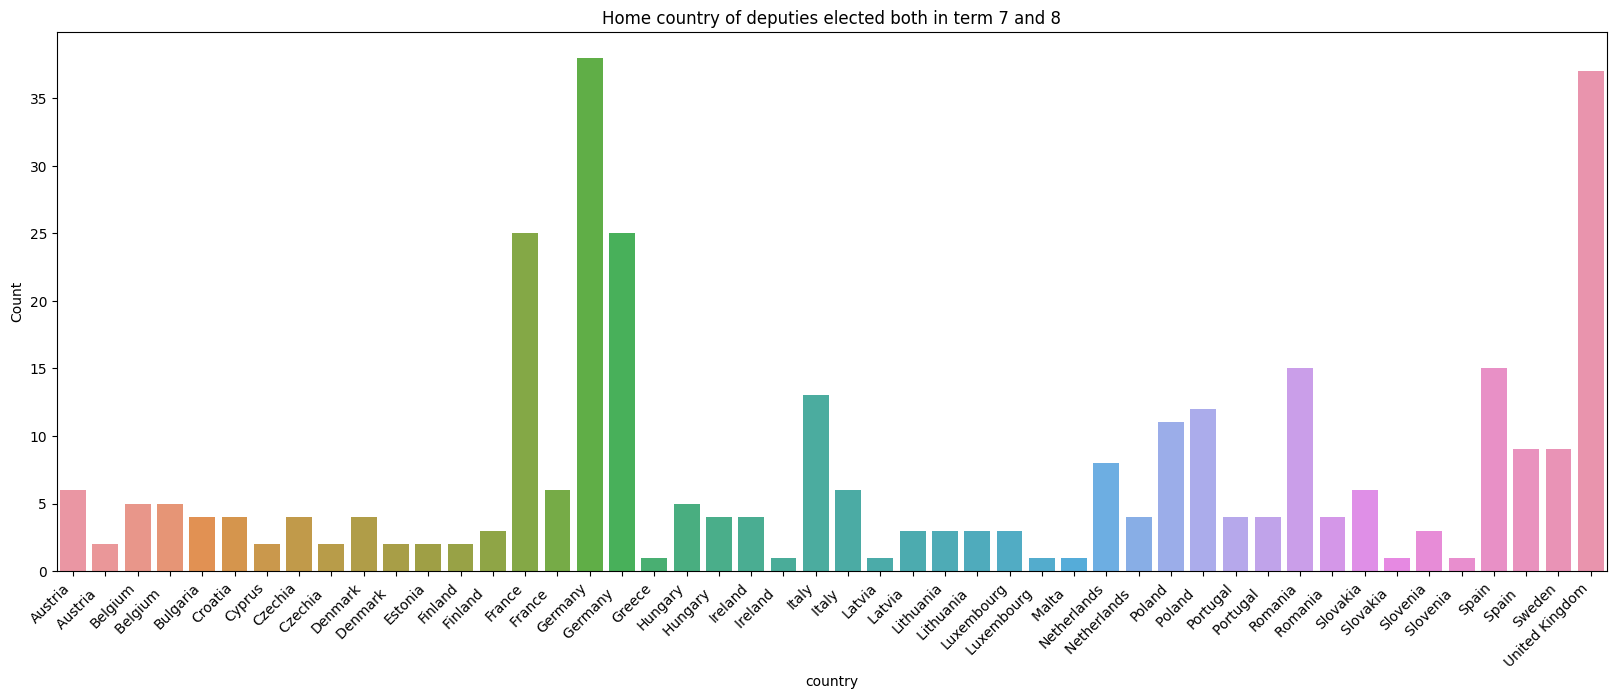

In [32]:
df_plt2 = terms_78.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c1 = sns.barplot(x = df_plt2.index, y = 'Count', data = df_plt2)
c1.set(title='Home country of deputies elected both in term 7 and 8')
c1.set_xticklabels(c1.get_xticklabels(), rotation=45, horizontalalignment='right')
c1.set_ylabel('Count')

In [33]:
# create a dataset with all deputies that have been elected for term 7 and 9
terms_79 = pd.DataFrame(columns = merged79.columns)

for node in g:
    if sum(result79[result79['target'] == node].value_counts()) == 2:
        terms_79 = pd.concat([terms_79, merged79[merged79['fullName'] == node]], ignore_index=True)
terms_79 = terms_79.drop_duplicates(subset=['fullName'])
terms_79

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,François ALFONSI,96750,France,Group of the Greens/European Free Alliance,NaN,Partitu di a Nazione Corsa,2009-2014,07-2009,male,centre-left
2,Pablo ARIAS ECHEVERRÍA,96808,Spain,European People's Party,NaN,Partido Popular,2009-2014,07-2009,male,centre-right
4,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
6,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2009-2014,07-2009,female,centre-left
8,Sergio BERLATO,4746,Italy,European People's Party,NaN,Il Popolo della Libertà,2009-2014,07-2009,male,centre-right
...,...,...,...,...,...,...,...,...,...,...
218,Tatjana ŽDANOKA,28619,Latvia,Group of the Greens/European Free Alliance,NaN,Par cilvēka tiesībām vienotā Latvijā,2009-2014,07-2009,female,centre-left
220,Roberts ZĪLE,28615,Latvia,European Conservatives and Reformists Group,NaN,Tēvzemei un Brīvībai/LNNK,2009-2014,07-2009,male,right
222,Milan ZVER,96933,Slovenia,European People's Party,NaN,Slovenska demokratska stranka,2009-2014,07-2009,male,centre-right
224,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2009-2014,07-2009,male,centre-right


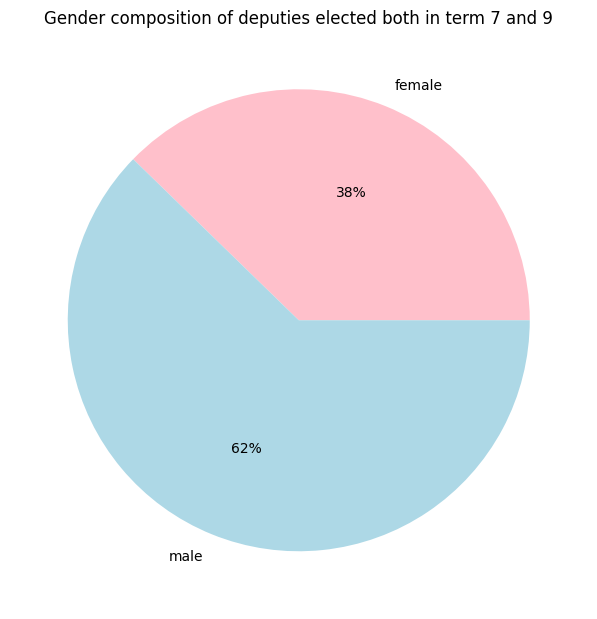

In [34]:
df_plt3 = terms_79.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt3['Count'], labels = df_plt3.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 7 and 9')
plt.savefig("gender3.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

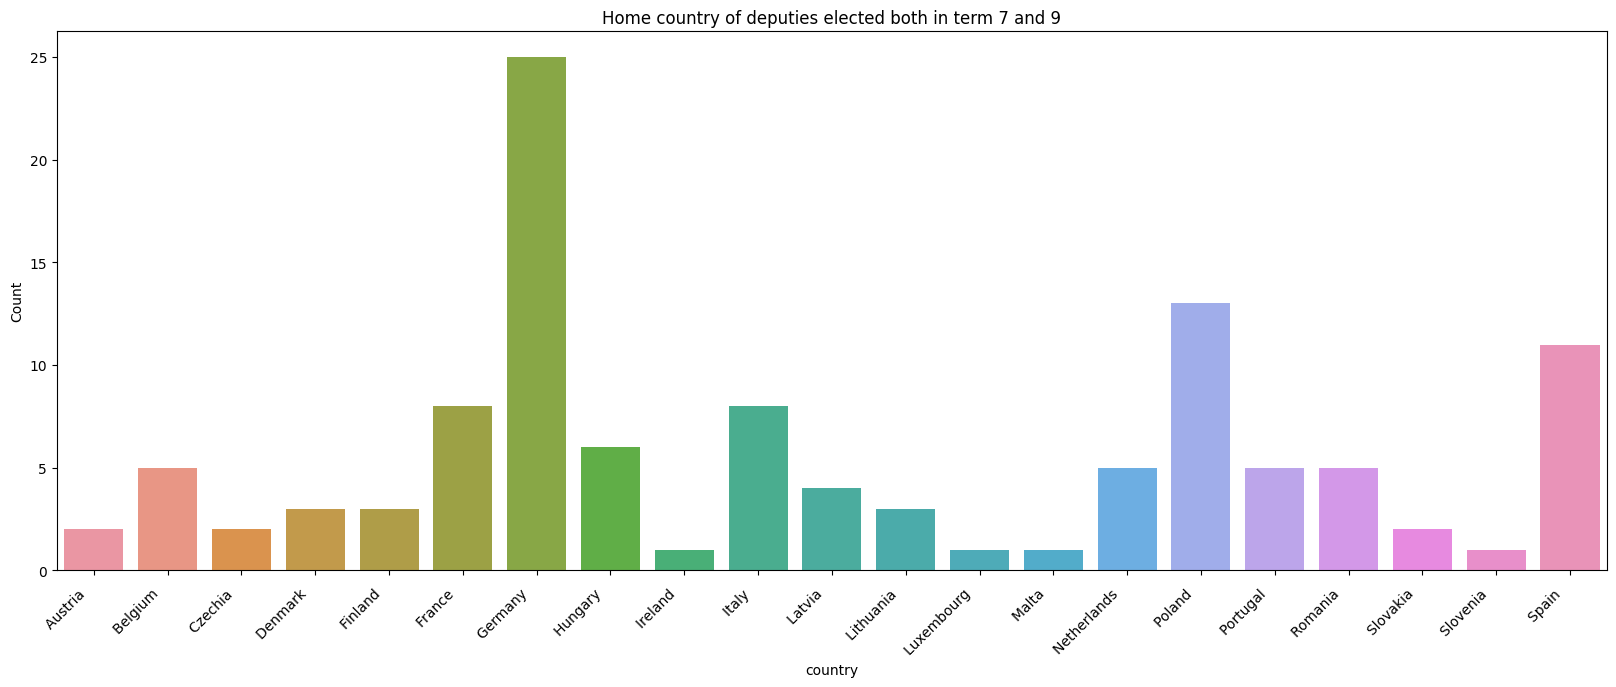

In [35]:
df_plt3 = terms_79.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c2 = sns.barplot(x = df_plt3.index, y = 'Count', data = df_plt3)
c2.set(title='Home country of deputies elected both in term 7 and 9')
c2.set_xticklabels(c2.get_xticklabels(), rotation=45, horizontalalignment='right')
c2.set_ylabel('Count')

In [36]:
# create a dataset with all deputies that have been elected for term 8 and 9
terms_89 = pd.DataFrame(columns = merged89.columns)

for node in g:
    if sum(result89[result89['target'] == node].value_counts()) == 2:
        terms_89 = pd.concat([terms_89, merged89[merged89['fullName'] == node]], ignore_index=True)

        terms_89 = terms_89.drop_duplicates(subset=['fullName'])
terms_89

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2014-2019,07-2014,female,centre-left
1,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2014-2019,07-2014,female,centre-left
2,Izaskun BILBAO BARANDICA,96922,Spain,Group of the Alliance of Liberals and Democrat...,NaN,Partido Nacionalista Vasco,2014-2019,07-2014,female,centre
3,Vilija BLINKEVIČIŪTĖ,96681,Lithuania,Group of the Progressive Alliance of Socialist...,NaN,Lietuvos socialdemokratų partija,2014-2019,07-2014,female,centre-left
4,Udo BULLMANN,4267,Germany,Group of the Progressive Alliance of Socialist...,NaN,Sozialdemokratische Partei Deutschlands,2014-2019,07-2014,male,centre-left
...,...,...,...,...,...,...,...,...,...,...
224,Marco ZANNI,124780,Italy,Europe of Freedom and Direct Democracy Group,Non-attached Members,Movimento 5 Stelle,2014-2019,07-2014,male,right
225,Tomáš ZDECHOVSKÝ,124713,Czechia,European People's Party,NaN,Křesťanská a demokratická unie - Československ...,2014-2019,07-2014,male,centre-right
226,Kosma ZŁOTOWSKI,124884,Poland,European Conservatives and Reformists Group,NaN,Prawo i Sprawiedliwość,2014-2019,07-2014,male,right
227,Carlos ZORRINHO,124739,Portugal,Group of the Progressive Alliance of Socialist...,NaN,Partido Socialista,2014-2019,07-2014,male,centre-left


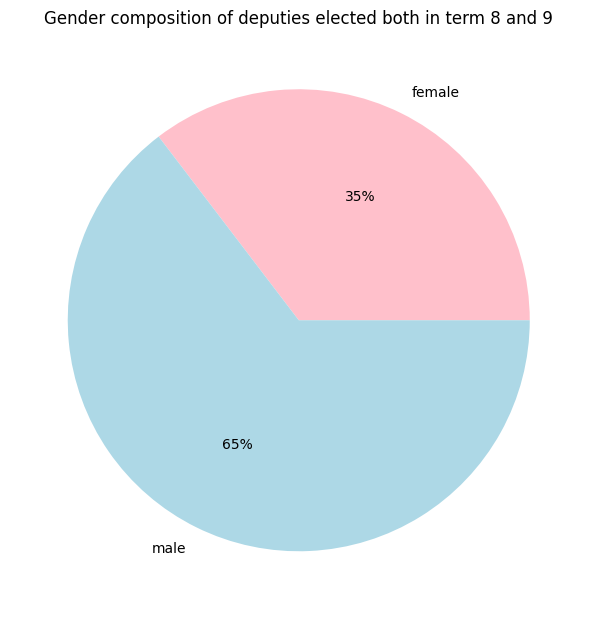

In [37]:
df_plt4 = terms_89.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt4['Count'], labels = df_plt4.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 8 and 9')
plt.savefig("gender4.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

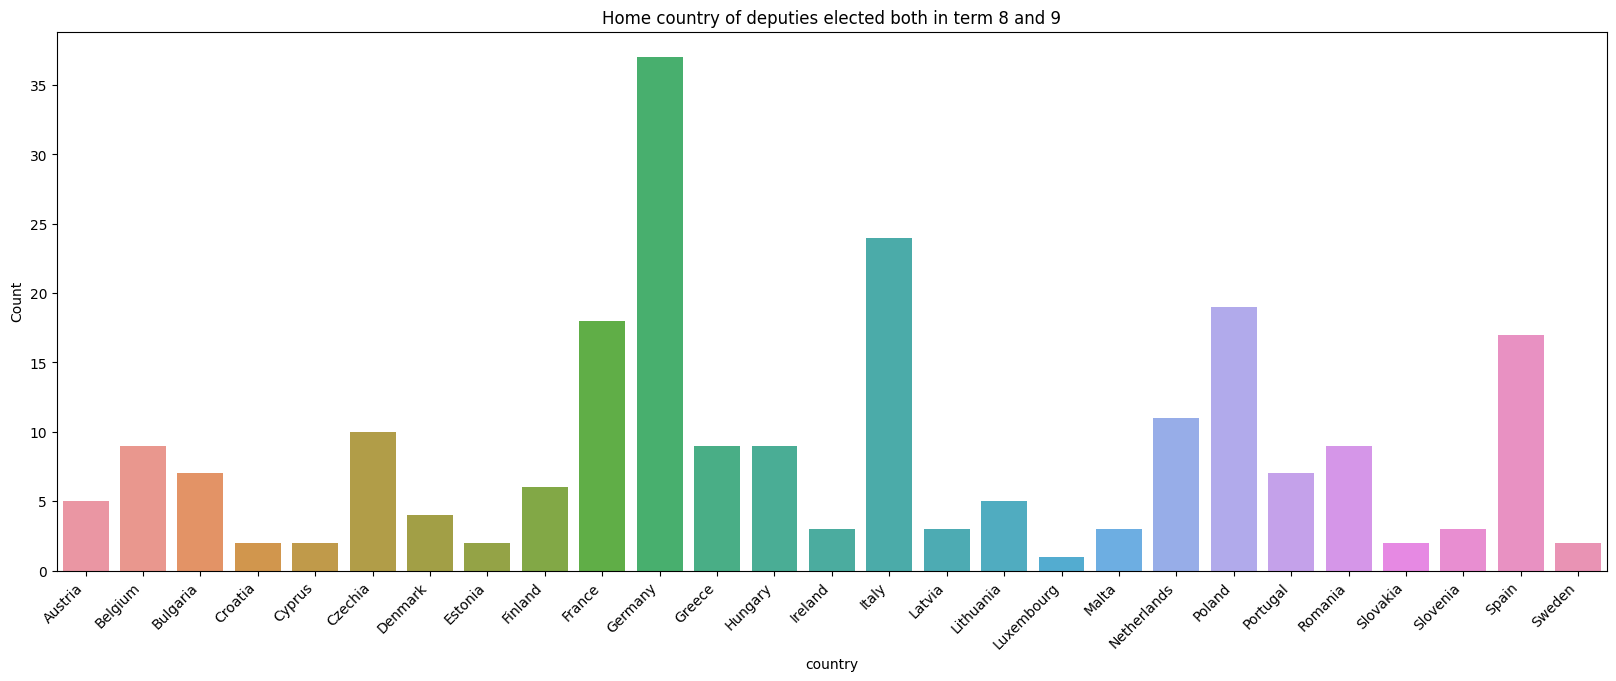

In [38]:
df_plt4 = terms_89.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c3 = sns.barplot(x = df_plt4.index, y = 'Count', data = df_plt4)
c3.set(title='Home country of deputies elected both in term 8 and 9')
c3.set_xticklabels(c3.get_xticklabels(), rotation=45, horizontalalignment='right')
c3.set_ylabel('Count')